# Behavioral Cloning

## CarND Project 3

#### Pre-requisite

The required packages are imported.

### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

In this project, NVIDIA architecture is used. This model includes the following layers:

- Input layer
- Normalization Layer
- Convolution Layer, 5x5, depth 24
    - max pooling 2x2
- Convolution Layer, 5x5, depth 36
    - max pooling 2x2
- Convolution Layer, 5x5, depth 48
    - max pooling 2x2
- Convolution Layer, 3x3, depth 64
    - max pooling 2x2
- Convolution Layer, 3x3, depth 64
    - max pooling 2x2
- Fully connected Layer: 1164
- Fully connected layer: 100
    - Dropout
- Fully connected layer: 50
    - Dropout
- fully connected layer: 10

#### 2. Attempts to reduce overfitting in the model
1-Two dropout layers with probability of 0.3 are added to after the second and third fully connected layers to increase the randomization and reduce the overfitting.

2- The data is shuffled so the order of the training data does not have an effect on the performance.

3- About 70% of the instances in which car is going straight with small steering angles are removed so the model does not overfit on driving straight.


#### 3. Model parameter tuning

In this model:

1. Mean Squared Error (MSE) is used as the metric for the loss function.
2. Adam Optimizer is used as the optizer of the proposed model.

#### 4. Appropriate training data

In this project, the training data are images of the camera mounted on the vehicle, and the output is a steering angle which is applied to the car to remain inside lanes.
The udacity provided driving data was used for training the network here. Two preprocessing operations were implemented on this data:

1- The top half of the training images is removed because it includes the sky and does not have an effect on the steering. So the network can focus on the bottom half of the image which includes the road and its boundaries. Those are the information crucial for training.

2- The training images are reduced in size for faster training.

### Model Architecture and Training Strategy

#### 1. Solution Design Approach
 In the beginning of the project, a flattened image aconnected to a single output node was chosen as my architeture (same as the class videos). However the simulator showed that the trained model makes the car swerve to left and right alot.

In the second step, LeNet model was used, which improved the driving performance but exceeded the road boundaries. Finally, a more powerful netwrok, NVIDIA was chosen as the architecture. 

As mentioned before, NVIDIA is used as the main network in this project. The following layers are added to this structure:
- Image resize
- Cropping the top of the image
- a fully connected later at the end:  Because this network is performing regression, so the final output is only one value.

#### 2. Final Model Architecture

- Input layer
- Normalization Layer
- 2D Cropping
- Image Resize
- Convolution Layer, 5x5, depth 24
    - max pooling 2x2
- Convolution Layer, 5x5, depth 36
    - max pooling 2x2
- Convolution Layer, 5x5, depth 48
    - max pooling 2x2
- Convolution Layer, 3x3, depth 64
    - max pooling 2x2
- Convolution Layer, 3x3, depth 64
    - max pooling 2x2
- Fully connected Layer: 1164
- Fully connected layer: 100
    - Dropout
- Fully connected layer: 50
    - Dropout
- fully connected layer: 10
- fully connected layer: 1

#### 3. Creation of the Training Set & Training Process

As mentioned before, most of the availbale training data is driving straight with very small steering angle. As a result, the network cannot handle curvature appropriately. The reason is that it does not learn to use larger steering anles and consequently exits the lane at curvatures.

- As mentioned before, 70% of samples where the vehicle was driving straight are removed to prevent the network from being biased towards driving straight.

- As a solution to this problem, the right and left camera images are added to the data set which provide a closer view of the road boundaries. The respective steering angle is also increased or decreased with a correction value (=0.25) to simulate steering back to the center of the lane. 

- Since the vehicle drives counter-clockwise most of the time, it will seem as the dominant action. In order to reduce this effect, the images are flipped to increase the number of samples where the vehicle is driving clockwise and as a result balance the training data.

##### Training Process

Because of the large size of the training process, a large part of the memory is occupied. The Keras library has a function called 'generator' which takes pieces of the data at a time instead of the whole dataset. Therefore, the training process is done faster and more efficiently.
Generators are used for train and validation of the model as following:
`train_generator = generator(training_lines,batch_size)` 
and
`validation_generator = generator(validation_lines, batch_size)`

Also below are some of the parameters used for training:
batch size = 32
train: 80% of data
test: 20% of the data

#### Train Image Augmentation Examples 

In this section, examples of data augmentation are shown using some files from the recorded data.
First, examples of using right and left camera images and correcting the correspoding steering angle are presented.
Second, examples of flipping and changing the steering angle are shown.

In [11]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

local_path1='./data/IMG/center_2016_12_01_13_38_26_906.jpg'
local_path2='./data/IMG/left_2016_12_01_13_38_26_906.jpg'
local_path3='./data/IMG/right_2016_12_01_13_38_26_906.jpg'
            
angle = -0.8098114
img1 = cv2.imread(local_path1)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread(local_path2)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img3 = cv2.imread(local_path3)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

correction = 0.25
Angles = [angle + correction, angle, angle - correction]

The corresponding steering angles are: [-0.5598114, -0.8098114, -1.0598114]


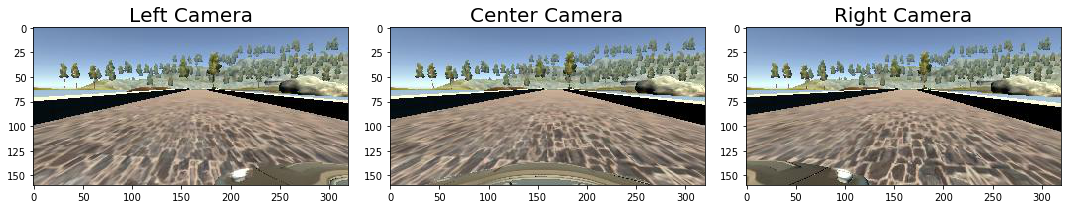

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
f.tight_layout()
ax1.imshow(img2)
ax1.set_title('Left Camera', fontsize=20)
ax2.imshow(img1)
ax2.set_title('Center Camera', fontsize=20)
ax3.imshow(img3)
ax3.set_title('Right Camera', fontsize=20)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
print('The corresponding steering angles are:', Angles)

The corresponding steering angles are: [0.5598114, 0.8098114, 1.0598114]


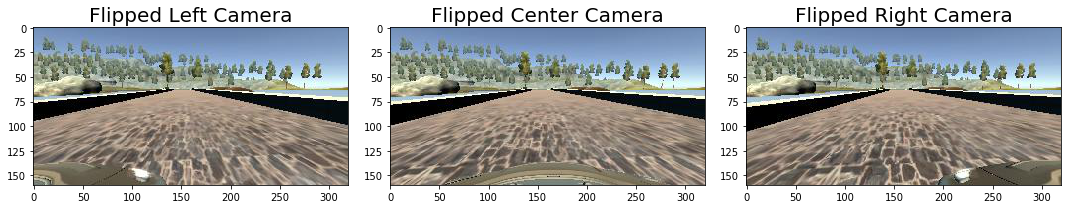

In [13]:
f_img1=cv2.flip(img1,1)
f_img2=cv2.flip(img2,1)
f_img3=cv2.flip(img3,1)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
f.tight_layout()
ax1.imshow(f_img2)
ax1.set_title('Flipped Left Camera', fontsize=20)
ax2.imshow(f_img1)
ax2.set_title('Flipped Center Camera', fontsize=20)
ax3.imshow(f_img3)
ax3.set_title('Flipped Right Camera', fontsize=20)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
Angles2 = [-angle - correction, -angle, -angle + correction]
print('The corresponding steering angles are:', Angles2)

#### 4. Results

Using the proposed architecture and pre-processing introduced in this project, the vehicle was able to successfully drive on the Track1 without violating the lane boundary lines.